# **Titanic_Dataset_Exploratory_Analysis**

The purpose of this notebook is to analyse the well-known Titanic dataset obtained from Kaggle.
Our goal is to address the following questions through our analysis:



*   Passengers demographics on the titanic (age,sex,class)
*   Origins of the passengers.
*   Identification of passengers travelling alone or with family
*   Factors influencing survival during the sinking.



In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame

In [107]:
titanic_df = pd.read_csv('/content/Titanic-Dataset.csv')

In [108]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
#information about the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From above, we see that the dataset is missing a lot of information in for the **Cabin** column. We'll need ton deal with the missing data.

Other information seems to be complete except the **age** one

<Axes: >

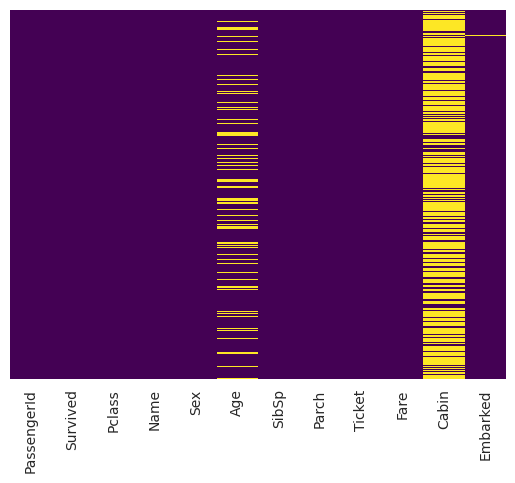

In [110]:
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [111]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The describe method in pandas provides valuable summary statistics for the dataset, offering quick insights.

By examining the survived column, where 1 indicates survivals and 0 indicates deaths, we can determine the overall survival rate. The mean value indicates that approximatially 38% of the individuals in the dataset survived the sinking.

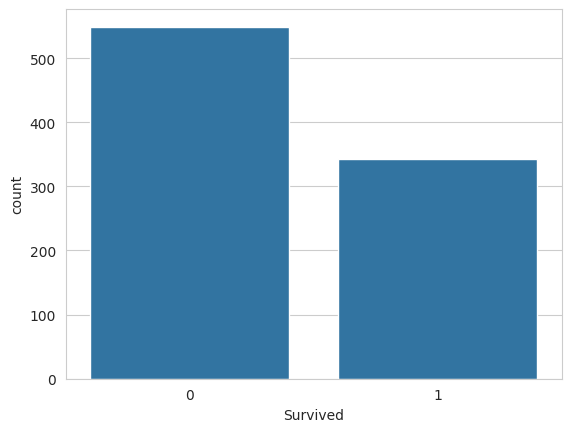

In [112]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic_df)
plt.savefig("survival.png")

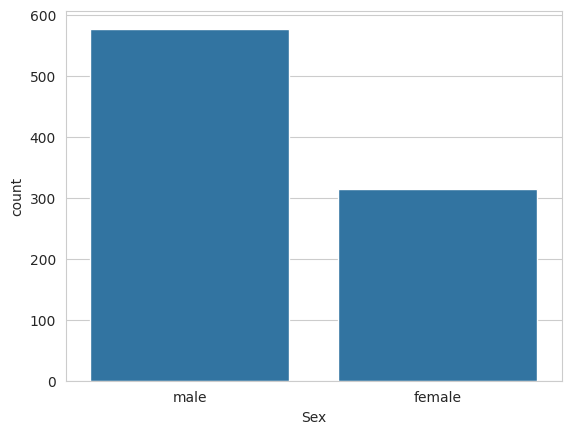

In [113]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',data=titanic_df)
plt.savefig("sex.png")

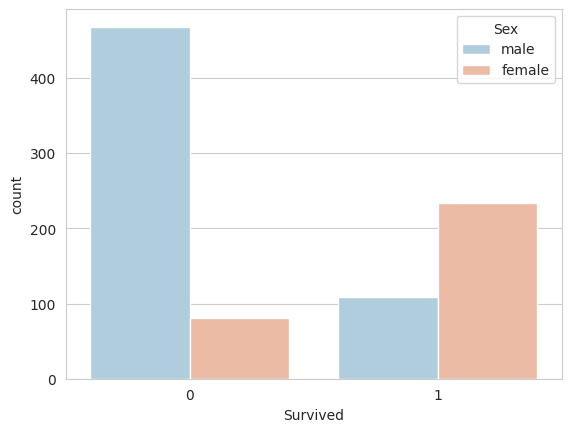

In [114]:

sns.countplot(x='Survived',hue='Sex',data=titanic_df,palette='RdBu_r')
plt.savefig("survival_by_sex.png")

/tmp/ipython-input-2097778000.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass',data=titanic_df,palette='rainbow')


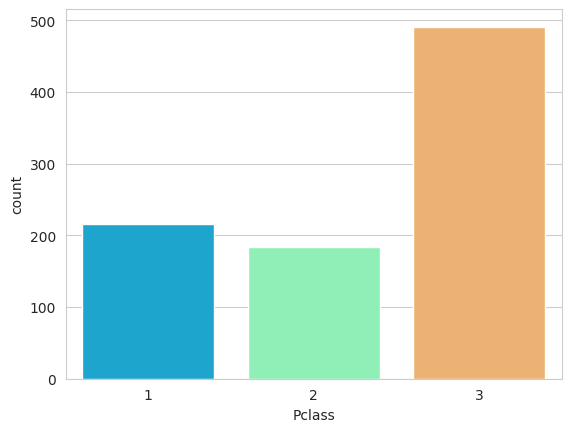

In [115]:
sns.countplot(x='Pclass',data=titanic_df,palette='rainbow')
plt.savefig("survival_by_pclass.png")

<Axes: xlabel='Survived', ylabel='count'>

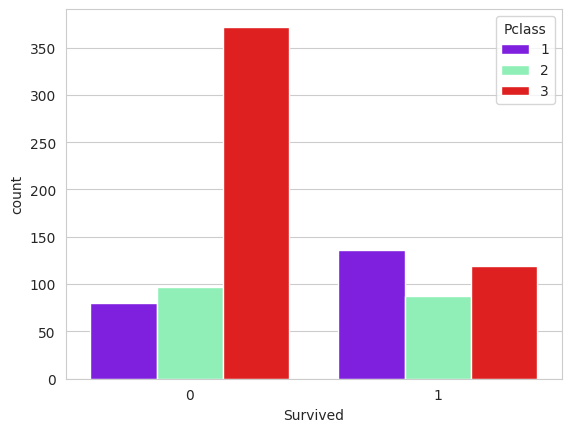

In [116]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_df,palette='rainbow')

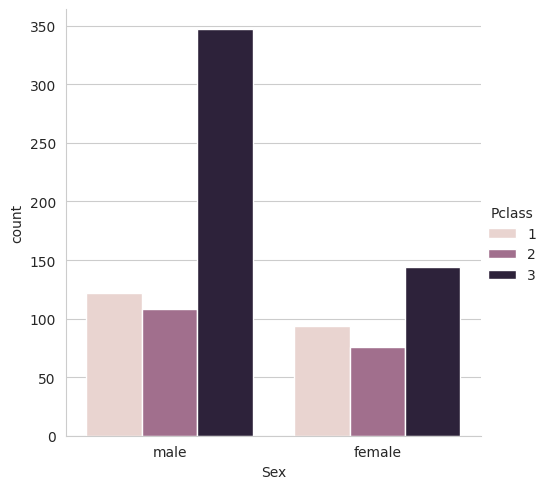

In [117]:
sns.catplot(x='Sex',data=titanic_df,hue='Pclass',kind='count')

However, considering that the third class had a higher proportion of men compared to the women(and children), it is worth noticing the famous protocol "Women and children first!" followed by the ship's administration when allocating lifeboat spots.

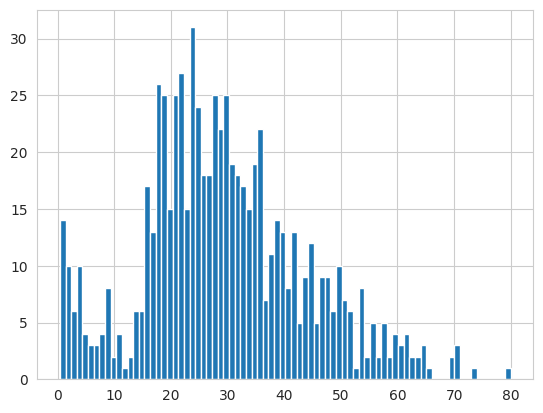

In [118]:
titanic_df['Age'].hist(bins=80)
plt.savefig("age_hist.png")

<Axes: >

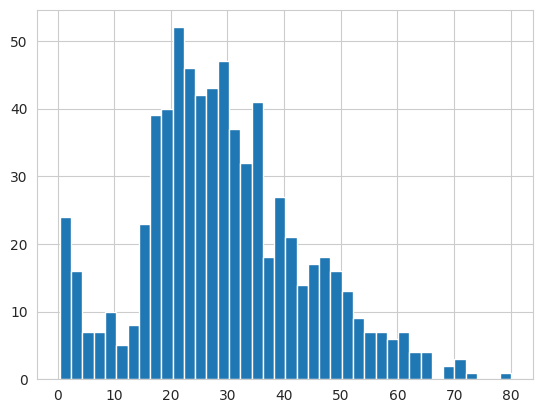

In [119]:
titanic_df['Age'].hist(bins=40)

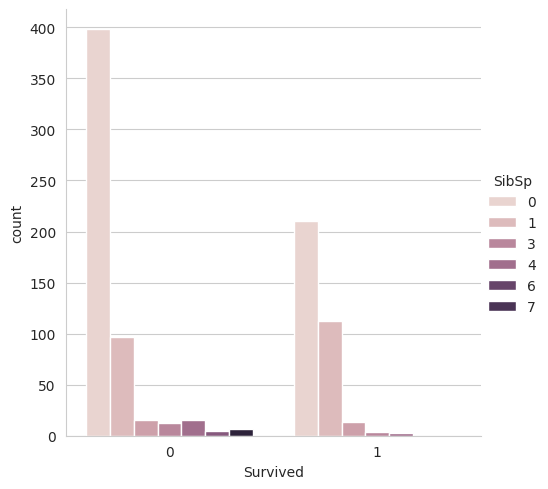

In [120]:
sns.catplot(x='Survived', data=titanic_df,hue='SibSp',kind='count')

The attribute Embarked tells us about the passengers' port of embarkation, with 'C' representing Cherbourg, 'Q' reprenting Queenstown, and 'S' representing Southampton

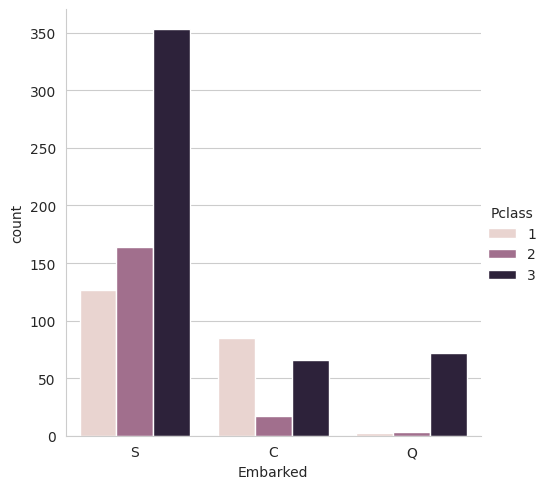

In [121]:
sns.catplot(x='Embarked',data=titanic_df,hue='Pclass',kind='count')

Since most of the passsengers from the third class are from the Southampton including the main characters Jack and Rose, that tells us briefly about the socio-economic conditions of the city.

# **DataSet Cleaning**

In [122]:
titanic_df['Age'].mean()

np.float64(29.69911764705882)

In [123]:
titanic_df.groupby(by='Pclass')['Age'].mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [124]:
def m_age(c):
  Age=c[0]
  Pclass=c[1]
  if pd.isnull(Age):
    if Pclass==1:
      return 37
    elif Pclass==2:
      return 29
    else:
      return 24
  else:
    return Age

In [125]:
titanic_df['Age']=titanic_df[['Age','Pclass']].apply(m_age,axis=1)

/tmp/ipython-input-2039756376.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=c[0]
/tmp/ipython-input-2039756376.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=c[1]


<Axes: >

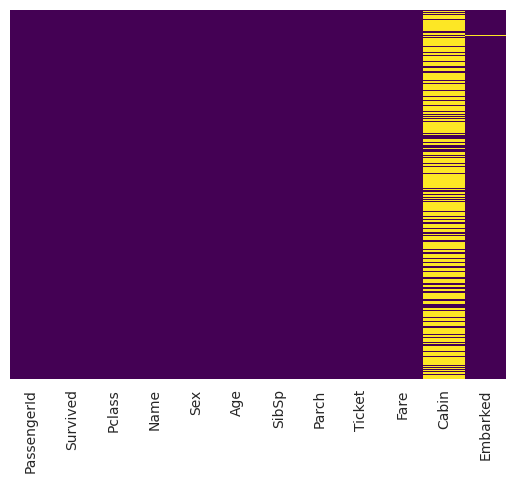

In [126]:
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [127]:
titanic_df.drop('Cabin',axis=1,inplace=True)

<Axes: >

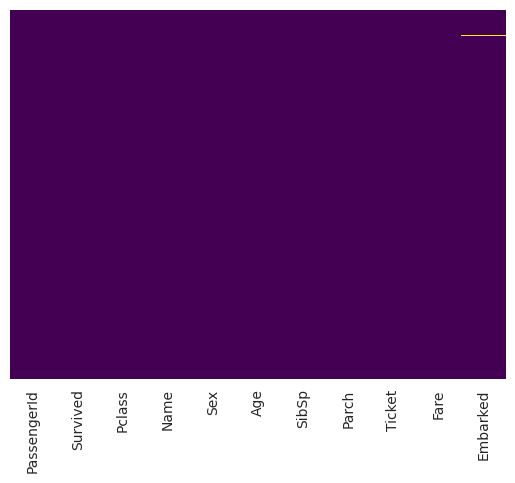

In [128]:
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [129]:
titanic_df=titanic_df.dropna()

<Axes: >

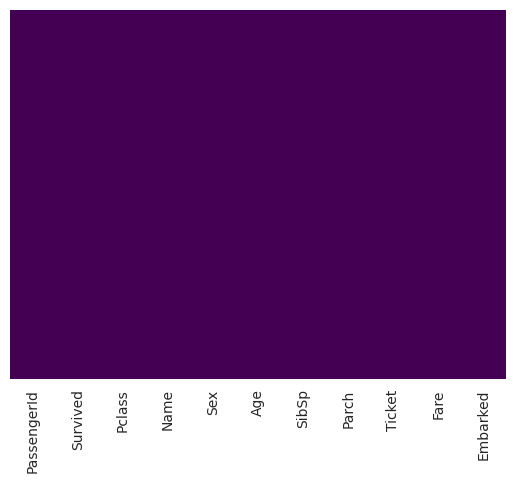

In [130]:
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [131]:
embarked=pd.get_dummies(titanic_df['Embarked'], drop_first=True)

In [132]:
embarked

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [133]:
sex=pd.get_dummies(titanic_df['Sex'],drop_first=True)

In [134]:
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [135]:
titanic_df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

/tmp/ipython-input-3299894575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)


In [136]:
df_reversed = titanic_df.iloc[::-1].reset_index(drop=True)
print(df_reversed)

     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            891         0       3  32.0      0      0   7.7500
1            890         1       1  26.0      0      0  30.0000
2            889         0       3  24.0      1      2  23.4500
3            888         1       1  19.0      0      0  30.0000
4            887         0       2  27.0      0      0  13.0000
..           ...       ...     ...   ...    ...    ...      ...
884            5         0       3  35.0      0      0   8.0500
885            4         1       1  35.0      1      0  53.1000
886            3         1       3  26.0      0      0   7.9250
887            2         1       1  38.0      1      0  71.2833
888            1         0       3  22.0      1      0   7.2500

[889 rows x 7 columns]


In [137]:
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [138]:
titanic_df=pd.concat([titanic_df,sex,embarked],axis=1)

In [139]:
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


# **Logistical Regression**

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [141]:
X_train, X_test, y_train, y_test = train_test_split(titanic_df.drop('Survived',axis=1),
                                                    titanic_df['Survived'], test_size=0.30,
                                                    random_state=101)

In [142]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [143]:
predictions=model.predict(X_test)

In [144]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [145]:
accuracy=accuracy_score(y_test,predictions)

In [146]:
accuracy

0.8239700374531835

In [147]:
cm=confusion_matrix(y_test,predictions)

In [148]:
cm

array([[149,  14],
       [ 33,  71]])